In [1]:
def loss(x):
    return x**4-3*(x**3)+x

In [72]:
import numpy as np
# Simple implementation of GD (Forward Euler)
# Global minimum at x=2.198 where f(2.198)=-6.318
# Local minimum at x=-0.312 where f(-0.312)=-0.211
# Separatrix at x=0.364091
# If x>separatrix it will end up at the global minimum
# If x<separatrix it will end up at the suboptimal local minimum

def gradient(x):
    return 4*(x**3)-9*(x**2)+1

lr = 0.01
T = 2500000
sims = 10
regret = np.zeros(T)
for sim in range(sims):
    print(sim)
    # Correct arm
    # x_0 = np.random.uniform(low=0.365,high=0.365+1.5)
    x_0 = 4
    # Incorrect arm
    x_1 = -1
    #sample_mean_0 = loss(x_0)
    #sample_mean_1 = loss(x_1)
    pulls_0 = 1
    pulls_1 = 1
    for t in range(1,T+1):
        explore = np.random.binomial(1,1/t)
        if explore:
            arm = np.random.binomial(1,0.5)
        else:
            # arm = np.argmin([sample_mean_0,sample_mean_1])
            arm = np.argmin([loss(x_0),loss(x_1)])
        if arm == 0:
            x_0 = x_0-lr*gradient(x_0)
            #sample_mean_0 = (sample_mean_0*pulls_0+loss(x_0))/(pulls_0+1)
            pulls_0 = pulls_0 + 1
        else:
            x_1 = x_1-lr*gradient(x_1)
            #sample_mean_1 = (sample_mean_1*pulls_1+loss(x_1))/(pulls_1+1)
            pulls_1 = pulls_1 + 1
        regret[t-1] = (regret[t-1] + pulls_1-1)
regret = regret/sims
        

0
1
2
3
4
5
6
7
8
9


In [74]:
pulls_0

2499995

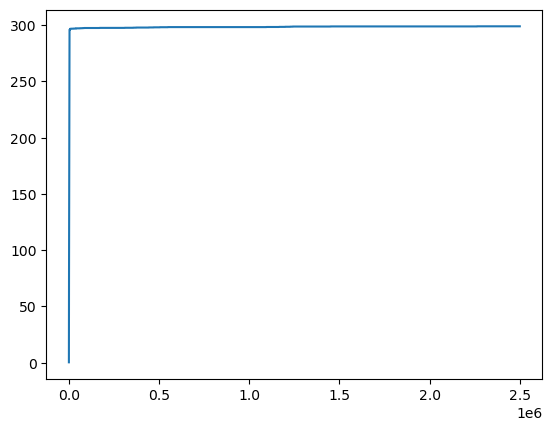

In [73]:
import matplotlib.pyplot as plt

plt.plot(range(T), regret)

In [28]:
regret

array([2.12700139e+14, 1.05218451e-01, 3.00085787e-02, ...,
       8.28249806e-03, 8.28246346e-03, 8.28242887e-03], shape=(25000,))